In [41]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
import csv
import pandas as pd

In [42]:
# Example set size.
M = 100

# Reset pseudo random generator to a known value so that results are reproducible.
np.random.seed(42)

def target_function(M, x):
    y = 1 + np.sin(2*np.pi*x)
    y = y.reshape(M, 1)
    y_noisy = y + 0.1*np.random.randn(M, 1)
    return y, y_noisy

In [43]:
x = np.linspace(0, 1, M).reshape(M, 1)

y, y_noisy = target_function(M, x)

In [44]:
i = 0
writer = csv.writer(open("./poly_reg_p.csv", 'w'), delimiter=',')
for row in y_noisy:
    writer.writerow((x[i][0], y_noisy[i][0]))
    i = i + 1

In [45]:
df = pd.read_csv('./poly_reg_p.csv', header=None)

x = df[0].to_numpy()
y_noisy = df[1].to_numpy()
           
x = x.reshape(len(x),1)
y_noisy = y_noisy.reshape(len(x),1)

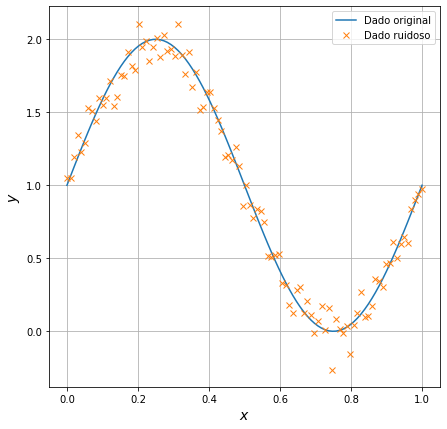

In [46]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

## holdout (70/30%)

In [47]:
# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.3, random_state=42)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

include_bias = True
mean_vec = []
train_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_train_predict = polynomial_regression.predict(x_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    train_vec.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

tamanho conjunto de treinamento: 70
tamanho conjunto de validação: 30


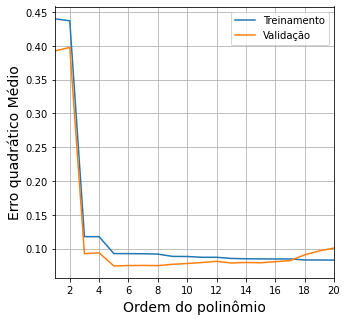

In [65]:
# Plot results.
plt.figure(figsize=(5, 5))
plt.plot(range(1, 21), train_vec, label='Treinamento')
plt.plot(range(1, 21), mean_vec, label='Validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()
#Show the plot.
plt.show()

## k-fold

In [51]:
# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

mean_vec = []
std_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

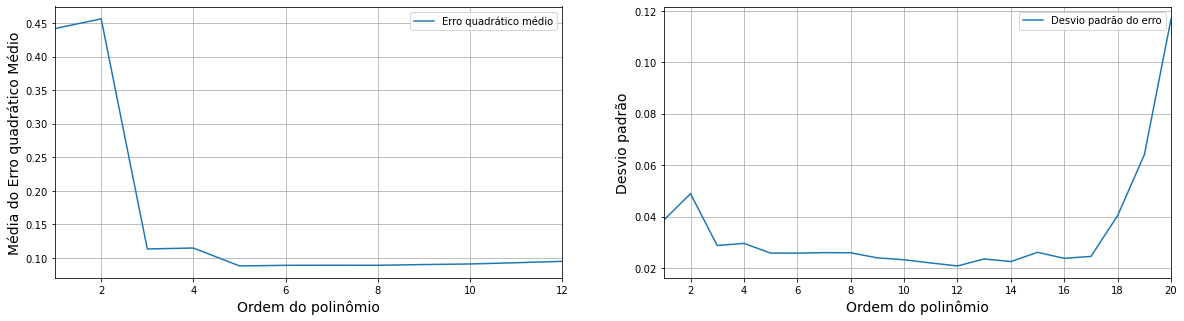

In [52]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 21), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 21), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

#Show the plot.
plt.show()

## Leave-p-out (p=1)

In [53]:
# Instantiate the LOOCV object.
loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y_noisy, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

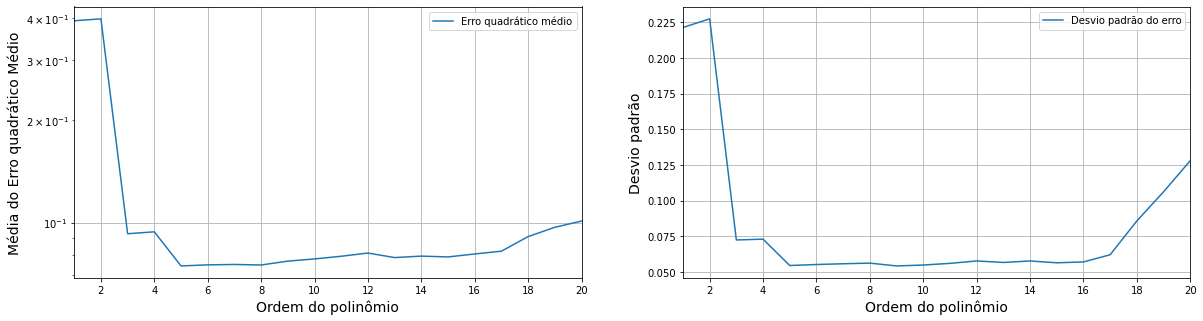

In [54]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 21), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.yscale('log')
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
#plt.ylim([0.78, 0.81])
plt.legend()
plt.grid()


ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 21), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

#Show the plot.
plt.show()


## Learning-curves

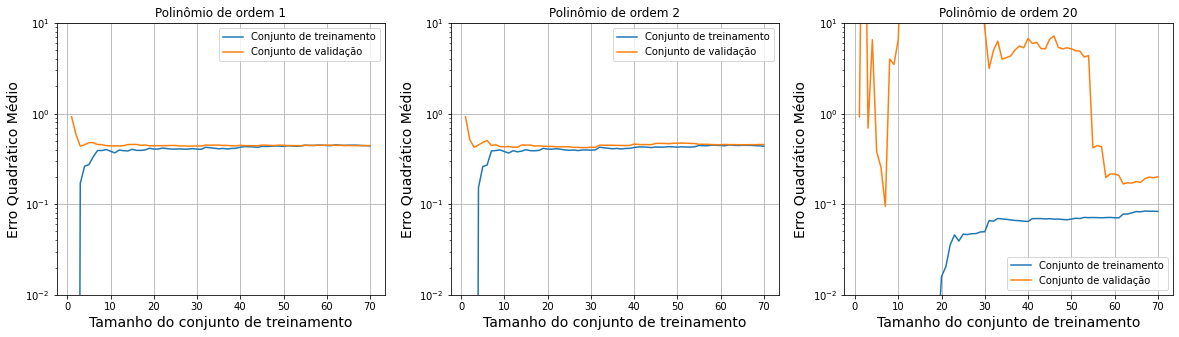

In [56]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.ylim([1e-2, 10])
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
#Show the plot.
plt.show()

 # Resposta:
Após analisar os resultados podemos notar que a ordem dos polinómios inferiores a ordem 20 ( ou seja os polonómios de ordem 1 e 2 ) se aproximam melhor ao modelo gerador,apresentam melhor desempenho no seu treinamento.  

## Train model

In [66]:
degree = 5
include_bias = False

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=degree, include_bias=include_bias)
# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
model = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

# Train model.
model.fit(x, y_noisy)

# Prediction
y_pred = model.predict(x)

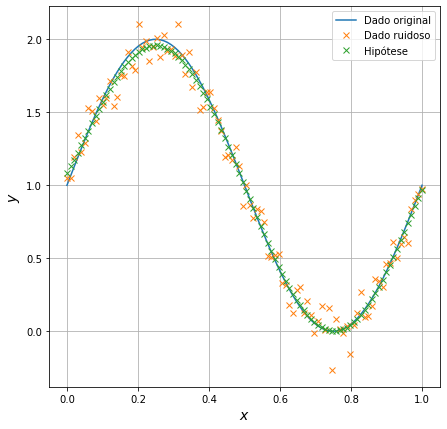

In [63]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y_pred, 'x', label='Hipótese')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()